- ✅ **Cell 1** - Importing libraries and setup
- ✅ **Cell 2** - Loading and initial data analysis
- ✅ **Cell 3** - Data preprocessing (Label Encoding)
- ✅ **Cell 4** - Data splitting and training baseline model
- ✅ **Cell 5** - Cross-validation
- ✅ **Cell 6** - Testing on a specific example
- ✅ **Cell 7** - Validation Curves
- ✅ **Cell 8** - Learning Curves
- ✅ **Cell 9** - Grid Search for hyperparameter optimization
- ✅ **Cell 10** - Final evaluation and conclusions


In [1]:
# =============================================================================
# CELL 1: Importing libraries and setup
# =============================================================================
print("🚗 DATA ANALYSIS OF CARS (CAR EVALUATION)")
print("=" * 50)

import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, validation_curve, learning_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

# Setting up visualization
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("✅ Libraries loaded successfully!")


🚗 DATA ANALYSIS OF CARS (CAR EVALUATION)
✅ Libraries loaded successfully!


📊 DATA LOADING AND ANALYSIS
📈 General information about the dataset:
Data size: (1728, 7)
Number of records: 1728
Number of features: 6

🔍 First 5 records:
  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc

📊 Information about columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB
None

🎯

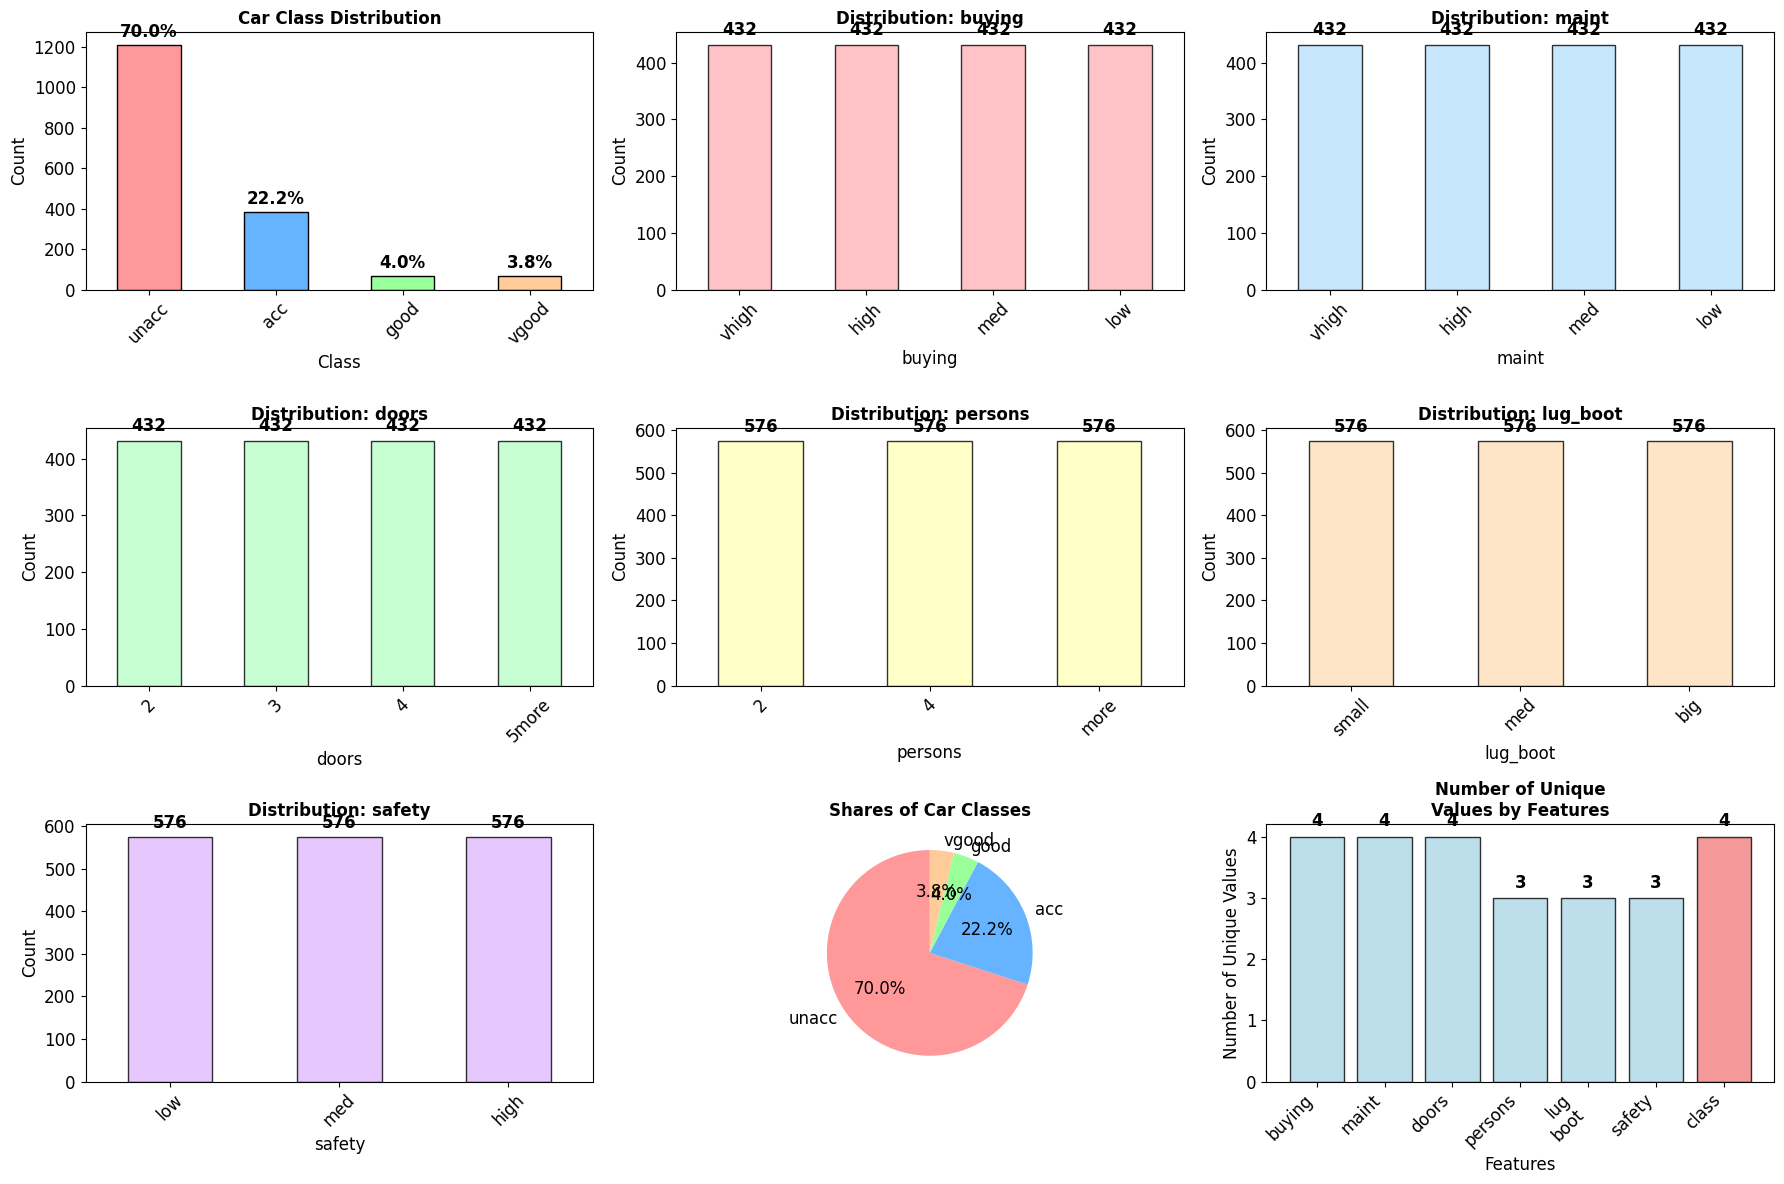


⚖️ Class Balance Analysis:
unacc: 1210 samples ( 70.0%)
acc:  384 samples ( 22.2%)
good:   69 samples (  4.0%)
vgood:   65 samples (  3.8%)

Imbalance ratio: 18.6:1
⚠️ Strong class imbalance - resampling recommended

📊 Detailed Statistics by Features:

BUYING:
  Unique values: 4
  Values: vhigh, high, med, low
  Most frequent: 'vhigh' (432 times, 25.0%)

MAINT:
  Unique values: 4
  Values: vhigh, high, med, low
  Most frequent: 'vhigh' (432 times, 25.0%)

DOORS:
  Unique values: 4
  Values: 2, 3, 4, 5more
  Most frequent: '2' (432 times, 25.0%)

PERSONS:
  Unique values: 3
  Values: 2, 4, more
  Most frequent: '2' (576 times, 33.3%)

LUG_BOOT:
  Unique values: 3
  Values: small, med, big
  Most frequent: 'small' (576 times, 33.3%)

SAFETY:
  Unique values: 3
  Values: low, med, high
  Most frequent: 'low' (576 times, 33.3%)

CLASS:
  Unique values: 4
  Values: unacc, acc, vgood, good
  Most frequent: 'unacc' (1210 times, 70.0%)

✅ Initial data analysis completed!


In [3]:
# =============================================================================
# CELL 2: Data Loading and Initial Analysis
# =============================================================================
print("📊 DATA LOADING AND ANALYSIS")
print("=" * 35)

input_file = 'car.data.txt'

# Reading data
X_raw = []
with open(input_file, 'r') as f:
    for line in f.readlines():
        data = line.strip().split(',')
        X_raw.append(data)

X_raw = np.array(X_raw)

# Creating DataFrame for better analysis
feature_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df = pd.DataFrame(X_raw, columns=feature_names)

print(f"📈 General information about the dataset:")
print(f"Data size: {df.shape}")
print(f"Number of records: {len(df)}")
print(f"Number of features: {len(feature_names) - 1}")

print(f"\n🔍 First 5 records:")
print(df.head())

print(f"\n📊 Information about columns:")
print(df.info())

print(f"\n🎯 Unique values in each column:")
for col in df.columns:
    unique_vals = df[col].unique()
    print(f"{col}: {unique_vals} ({len(unique_vals)} values)")

print(f"\n📊 Class distribution:")
class_counts = df['class'].value_counts()
print(class_counts)

# Checking for missing values
print(f"\n❓ Missing values:")
missing_data = df.isnull().sum()
if missing_data.sum() == 0:
    print("✅ No missing values!")
else:
    print(missing_data)

# Visualization of class distribution (CORRECTED)
plt.figure(figsize=(18, 12))

# 1. Distribution of the target variable
plt.subplot(3, 3, 1)
colors_class = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
class_counts.plot(kind='bar', color=colors_class, edgecolor='black')
plt.title('Car Class Distribution', fontsize=12, fontweight='bold')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Adding percentage ratio
total = class_counts.sum()
for i, v in enumerate(class_counts.values):
    plt.text(i, v + 20, f'{v/total*100:.1f}%', ha='center', va='bottom', fontweight='bold')

# 2-7. Distribution of categorical features
feature_cols = feature_names[:-1]  # Excluding the target variable
colors = ['#ffb3ba', '#bae1ff', '#baffc9', '#ffffba', '#ffdfba', '#e0bbff']

for i, col in enumerate(feature_cols):
    plt.subplot(3, 3, i + 2)  # Starting from position 2
    col_counts = df[col].value_counts()

    col_counts.plot(kind='bar', color=colors[i], edgecolor='black', alpha=0.8)
    plt.title(f'Distribution: {col}', fontsize=12, fontweight='bold')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    # Adding values on bars
    for j, v in enumerate(col_counts.values):
        plt.text(j, v + 10, str(v), ha='center', va='bottom', fontweight='bold')

# 8. Pie chart for classes
plt.subplot(3, 3, 8)
plt.pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%',
        startangle=90, colors=colors_class)
plt.title('Shares of Car Classes', fontsize=12, fontweight='bold')

# 9. Combined statistics
plt.subplot(3, 3, 9)
# Creating summary statistics for the number of unique values
unique_counts = [len(df[col].unique()) for col in feature_names]
col_names = [name.replace('_', '\n') for name in feature_names]

bars = plt.bar(range(len(feature_names)), unique_counts,
               color=['lightblue' if i < len(feature_names)-1 else 'lightcoral'
                      for i in range(len(feature_names))],
               edgecolor='black', alpha=0.8)

plt.title('Number of Unique\nValues by Features', fontsize=12, fontweight='bold')
plt.xlabel('Features')
plt.ylabel('Number of Unique Values')
plt.xticks(range(len(feature_names)), col_names, rotation=45, ha='right')

# Adding values on bars
for bar, count in zip(bars, unique_counts):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             str(count), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Additional class balance analysis
print(f"\n⚖️ Class Balance Analysis:")
print("=" * 25)
total_samples = len(df)
for class_name, count in class_counts.items():
    percentage = (count / total_samples) * 100
    print(f"{class_name}: {count:4d} samples ({percentage:5.1f}%)")

# Determining the type of imbalance
max_class_pct = class_counts.max() / total_samples * 100
min_class_pct = class_counts.min() / total_samples * 100
imbalance_ratio = class_counts.max() / class_counts.min()

print(f"\nImbalance ratio: {imbalance_ratio:.1f}:1")

if imbalance_ratio > 10:
    print("⚠️ Strong class imbalance - resampling recommended")
elif imbalance_ratio > 3:
    print("⚠️ Moderate class imbalance - consider during validation")
else:
    print("✅ Relatively balanced classes")

# Statistics by features
print(f"\n📊 Detailed Statistics by Features:")
print("=" * 35)
for col in feature_names:
    unique_vals = df[col].unique()
    most_frequent = df[col].value_counts().index[0]
    most_frequent_count = df[col].value_counts().iloc[0]

    print(f"\n{col.upper()}:")
    print(f"  Unique values: {len(unique_vals)}")
    print(f"  Values: {', '.join(unique_vals)}")
    print(f"  Most frequent: '{most_frequent}' ({most_frequent_count} times, {most_frequent_count/len(df)*100:.1f}%)")

print(f"\n✅ Initial data analysis completed!")


🔧 DATA PREPROCESSING
🔄 Encoding categorical variables:

buying:
  Original values: ['high' 'low' 'med' 'vhigh']
  Encoded: [0 1 2 3]

maint:
  Original values: ['high' 'low' 'med' 'vhigh']
  Encoded: [0 1 2 3]

doors:
  Original values: ['2' '3' '4' '5more']
  Encoded: [0 1 2 3]

persons:
  Original values: ['2' '4' 'more']
  Encoded: [0 1 2]

lug_boot:
  Original values: ['big' 'med' 'small']
  Encoded: [0 1 2]

safety:
  Original values: ['high' 'low' 'med']
  Encoded: [0 1 2]

class:
  Original values: ['acc' 'good' 'unacc' 'vgood']
  Encoded: [0 1 2 3]

📊 Encoding result:
Size of feature matrix X: (1728, 6)
Size of label vector y: (1728,)

🔍 Encoded data (first 10 records):
   buying  maint  doors  persons  lug_boot  safety  class
0       3      3      0        0         2       1      2
1       3      3      0        0         2       2      2
2       3      3      0        0         2       0      2
3       3      3      0        0         1       1      2
4       3      3      0

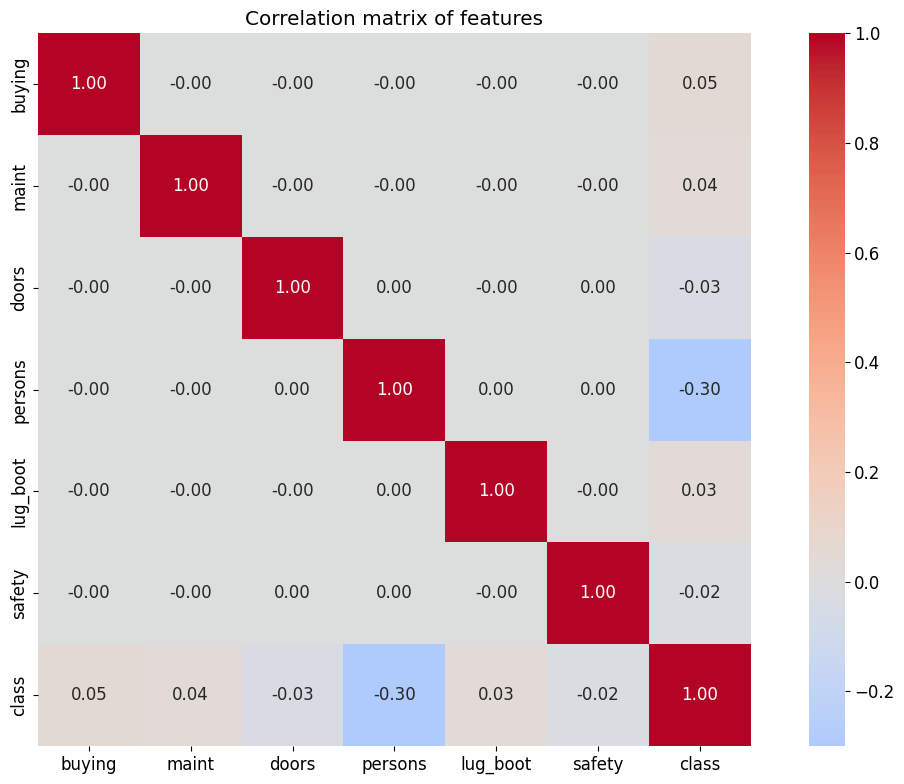


✅ Data preprocessing completed!


In [4]:
# =============================================================================
# CELL 3: Data Preprocessing (Label Encoding)
# =============================================================================
print("🔧 DATA PREPROCESSING")
print("=" * 25)

# Creating a copy of the original data
X_original = X_raw.copy()

# Encoding categorical variables
label_encoders = []
X_encoded = np.empty(X_raw.shape)

print("🔄 Encoding categorical variables:")

for i, column_name in enumerate(feature_names):
    encoder = preprocessing.LabelEncoder()
    X_encoded[:, i] = encoder.fit_transform(X_raw[:, i])
    label_encoders.append(encoder)

    print(f"\n{column_name}:")
    print(f"  Original values: {encoder.classes_}")
    print(f"  Encoded: {np.unique(X_encoded[:, i]).astype(int)}")

# Splitting features and target variable
X = X_encoded[:, :-1].astype(int)
y = X_encoded[:, -1].astype(int)

print(f"\n📊 Encoding result:")
print(f"Size of feature matrix X: {X.shape}")
print(f"Size of label vector y: {y.shape}")

# Creating DataFrame for encoded data
X_df = pd.DataFrame(X, columns=feature_names[:-1])
X_df['class'] = y

print(f"\n🔍 Encoded data (first 10 records):")
print(X_df.head(10))

# Statistics of encoded data
print(f"\n📈 Statistics of encoded features:")
print(X_df.describe())

# Correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = X_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f')
plt.title('Correlation matrix of features')
plt.tight_layout()
plt.show()

print(f"\n✅ Data preprocessing completed!")


🎯 TRAINING BASELINE MODEL
📊 Data Splitting:
Training set: 1382 samples
Test set: 346 samples

Class distribution in the training set:
  acc: 307 (22.2%)
  good: 55 (4.0%)
  unacc: 968 (70.0%)
  vgood: 52 (3.8%)

🌲 Training Random Forest:
✅ Baseline model trained!
Accuracy on the test set: 0.939

📊 Detailed classification report:
              precision    recall  f1-score   support

         acc       0.83      0.92      0.87        77
        good       1.00      0.36      0.53        14
       unacc       0.98      0.98      0.98       242
       vgood       1.00      0.85      0.92        13

    accuracy                           0.94       346
   macro avg       0.95      0.78      0.82       346
weighted avg       0.94      0.94      0.93       346



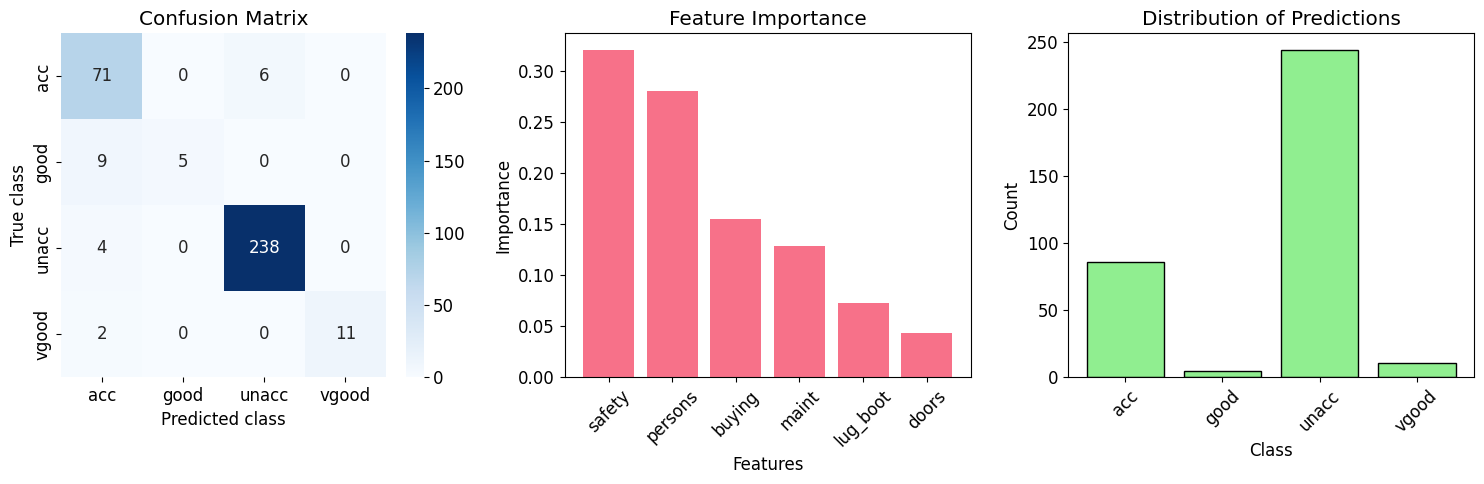


✅ Baseline model analyzed!


In [5]:
# =============================================================================
# CELL 4: Data Splitting and Training the Baseline Model
# =============================================================================
print("🎯 TRAINING BASELINE MODEL")
print("=" * 30)

# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"📊 Data Splitting:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# Checking class distribution
print(f"\nClass distribution in the training set:")
unique_train, counts_train = np.unique(y_train, return_counts=True)
for cls, count in zip(unique_train, counts_train):
    class_name = label_encoders[-1].inverse_transform([cls])[0]
    print(f"  {class_name}: {count} ({count/len(y_train)*100:.1f}%)")

# Training the baseline Random Forest model
print(f"\n🌲 Training Random Forest:")
params = {'n_estimators': 200, 'max_depth': 8, 'random_state': 7}
base_classifier = RandomForestClassifier(**params)
base_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = base_classifier.predict(X_test)
base_accuracy = accuracy_score(y_test, y_pred)

print(f"✅ Baseline model trained!")
print(f"Accuracy on the test set: {base_accuracy:.3f}")

# Detailed model evaluation
print(f"\n📊 Detailed classification report:")
target_names = label_encoders[-1].classes_
print(classification_report(y_test, y_pred, target_names=target_names))

# Confusion Matrix
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted class')
plt.ylabel('True class')

# Feature importance
plt.subplot(1, 3, 2)
feature_importance = base_classifier.feature_importances_
indices = np.argsort(feature_importance)[::-1]

plt.bar(range(len(feature_importance)), feature_importance[indices])
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(range(len(feature_importance)),
           [feature_names[i] for i in indices], rotation=45)

# Distribution of predictions
plt.subplot(1, 3, 3)
pred_counts = pd.Series(y_pred).value_counts().sort_index()
pred_labels = [label_encoders[-1].inverse_transform([i])[0] for i in pred_counts.index]
plt.bar(pred_labels, pred_counts.values, color='lightgreen', edgecolor='black')
plt.title('Distribution of Predictions')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print(f"\n✅ Baseline model analyzed!")


🔄 CROSS-VALIDATION
📊 Results of 5-fold cross-validation:
Accuracy by folds: [0.66763006 0.7716763  0.79479769 0.7826087  0.89855072]
Average accuracy: 0.783 (±0.073)
Accuracy of the classifier: 78.31%

📈 Multiple metrics:
accuracy: 0.783 (±0.073)
precision_weighted: 0.768 (±0.104)
recall_weighted: 0.783 (±0.073)
f1_weighted: 0.767 (±0.086)


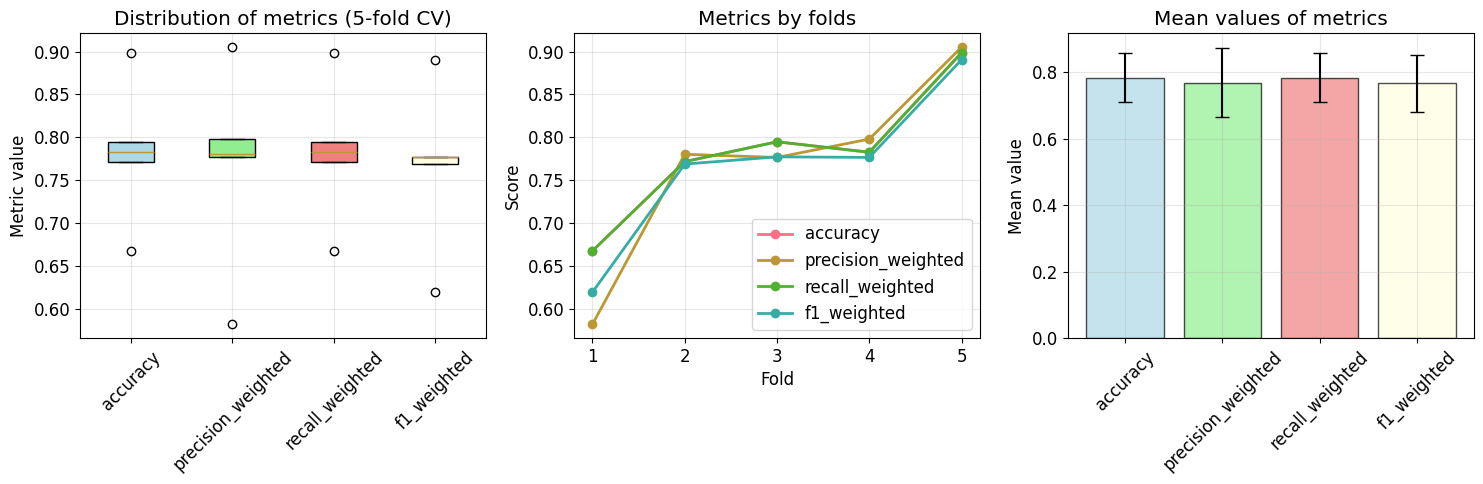


✅ Cross-validation completed!


In [6]:
# =============================================================================
# CELL 5: Cross-validation
# =============================================================================
print("🔄 CROSS-VALIDATION")
print("=" * 20)

# Cross-validation of the baseline model
cv_scores = cross_val_score(base_classifier, X, y, scoring='accuracy', cv=5)

print(f"📊 Results of 5-fold cross-validation:")
print(f"Accuracy by folds: {cv_scores}")
print(f"Average accuracy: {cv_scores.mean():.3f} (±{cv_scores.std():.3f})")
print(f"Accuracy of the classifier: {round(100*cv_scores.mean(), 2)}%")

# Various metrics
scoring_metrics = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
cv_results = {}

print(f"\n📈 Multiple metrics:")
for metric in scoring_metrics:
    scores = cross_val_score(base_classifier, X, y, scoring=metric, cv=5)
    cv_results[metric] = scores
    print(f"{metric}: {scores.mean():.3f} (±{scores.std():.3f})")

# Visualization of cross-validation results
plt.figure(figsize=(15, 5))

# Box plot of metrics
plt.subplot(1, 3, 1)
metrics_data = [cv_results[metric] for metric in scoring_metrics]
bp = plt.boxplot(metrics_data, labels=scoring_metrics, patch_artist=True)
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
plt.title('Distribution of metrics (5-fold CV)')
plt.ylabel('Metric value')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Line plot by folds
plt.subplot(1, 3, 2)
fold_numbers = range(1, 6)
for metric in scoring_metrics:
    plt.plot(fold_numbers, cv_results[metric], marker='o', label=metric, linewidth=2)
plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('Metrics by folds')
plt.legend()
plt.grid(True, alpha=0.3)

# Mean values with errors
plt.subplot(1, 3, 3)
means = [cv_results[metric].mean() for metric in scoring_metrics]
stds = [cv_results[metric].std() for metric in scoring_metrics]
plt.bar(scoring_metrics, means, yerr=stds, capsize=5,
        color=colors, alpha=0.7, edgecolor='black')
plt.title('Mean values of metrics')
plt.ylabel('Mean value')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n✅ Cross-validation completed!")


🧪 TESTING ON A SPECIFIC EXAMPLE
🔍 Test example:
Input data: ['vhigh', 'vhigh', '2', '2', 'small', 'low']
  buying: 'vhigh' -> 3
  maint: 'vhigh' -> 3
  doors: '2' -> 0
  persons: '2' -> 0
  lug_boot: 'small' -> 2
  safety: 'low' -> 1

🎯 Prediction result:
Predicted class: unacc

📊 Probabilities for all classes:
  acc: 0.0000 (0.00%)
  good: 0.0000 (0.00%)
  unacc: 1.0000 (100.00%)
  vgood: 0.0000 (0.00%)


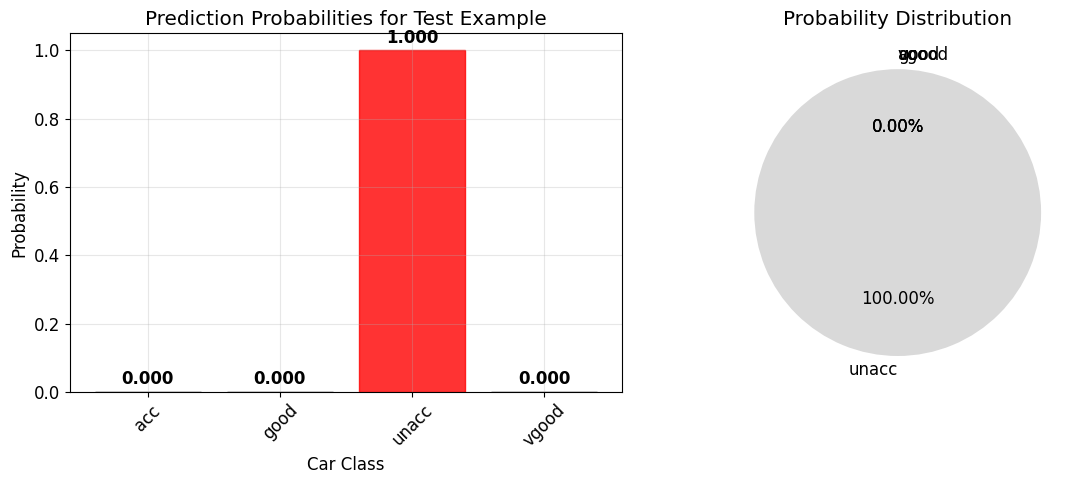


✅ Testing completed!


In [7]:
# =============================================================================
# CELL 6: Testing on a Specific Example
# =============================================================================
print("🧪 TESTING ON A SPECIFIC EXAMPLE")
print("=" * 40)

# Test example from the original code
input_data = ['vhigh', 'vhigh', '2', '2', 'small', 'low']
print(f"🔍 Test example:")
print(f"Input data: {input_data}")

# Encoding the test example
input_data_encoded = []
for i, item in enumerate(input_data):
    encoded_value = label_encoders[i].transform([item])[0]
    input_data_encoded.append(encoded_value)
    print(f"  {feature_names[i]}: '{item}' -> {encoded_value}")

input_data_encoded = np.array(input_data_encoded).reshape(1, -1)

# Prediction
output_class = base_classifier.predict(input_data_encoded)
output_proba = base_classifier.predict_proba(input_data_encoded)

# Decoding the result
predicted_class_name = label_encoders[-1].inverse_transform(output_class)[0]

print(f"\n🎯 Prediction result:")
print(f"Predicted class: {predicted_class_name}")

print(f"\n📊 Probabilities for all classes:")
for i, class_name in enumerate(label_encoders[-1].classes_):
    probability = output_proba[0][i]
    print(f"  {class_name}: {probability:.4f} ({probability*100:.2f}%)")

# Visualization of probabilities
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
class_names = label_encoders[-1].classes_
probabilities = output_proba[0]
colors = plt.cm.Set3(np.linspace(0, 1, len(class_names)))

bars = plt.bar(class_names, probabilities, color=colors, edgecolor='black')
plt.title('Prediction Probabilities for Test Example')
plt.xlabel('Car Class')
plt.ylabel('Probability')
plt.xticks(rotation=45)

# Highlighting the maximum probability
max_idx = np.argmax(probabilities)
bars[max_idx].set_color('red')
bars[max_idx].set_alpha(0.8)

# Adding values on the bars
for bar, prob in zip(bars, probabilities):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{prob:.3f}', ha='center', va='bottom', fontweight='bold')

plt.grid(True, alpha=0.3)

# Pie chart
plt.subplot(1, 2, 2)
plt.pie(probabilities, labels=class_names, autopct='%1.2f%%',
        startangle=90, colors=colors)
plt.title('Probability Distribution')

plt.tight_layout()
plt.show()

print(f"\n✅ Testing completed!")


📈 VALIDATION CURVES
🌲 Analyzing the n_estimators parameter:
Parameters: [ 25  50  75 100 125 150 175 200]
Average training scores: [0.80801483 0.80613319 0.80917122 0.80729135 0.80729083 0.80960516
 0.81018361 0.81047305]
Average validation scores: [0.74075228 0.73786378 0.73092569 0.72629304 0.73497194 0.73613136
 0.73612968 0.73844517]

🌿 Analyzing the max_depth parameter:
Parameters: [ 2  4  6  8 10]
Average training scores: [0.70023157 0.80613319 0.91840407 0.97569369 0.99768514]
Average validation scores: [0.70023289 0.73786378 0.77959621 0.7905705  0.79520483]

🍃 Analyzing the min_samples_split parameter:
Parameters: [ 2  5 10 15 20]
Average training scores: [0.91840407 0.91768079 0.91898294 0.91840396 0.91855025]
Average validation scores: [0.77959621 0.78075563 0.78595795 0.78596967 0.78422887]


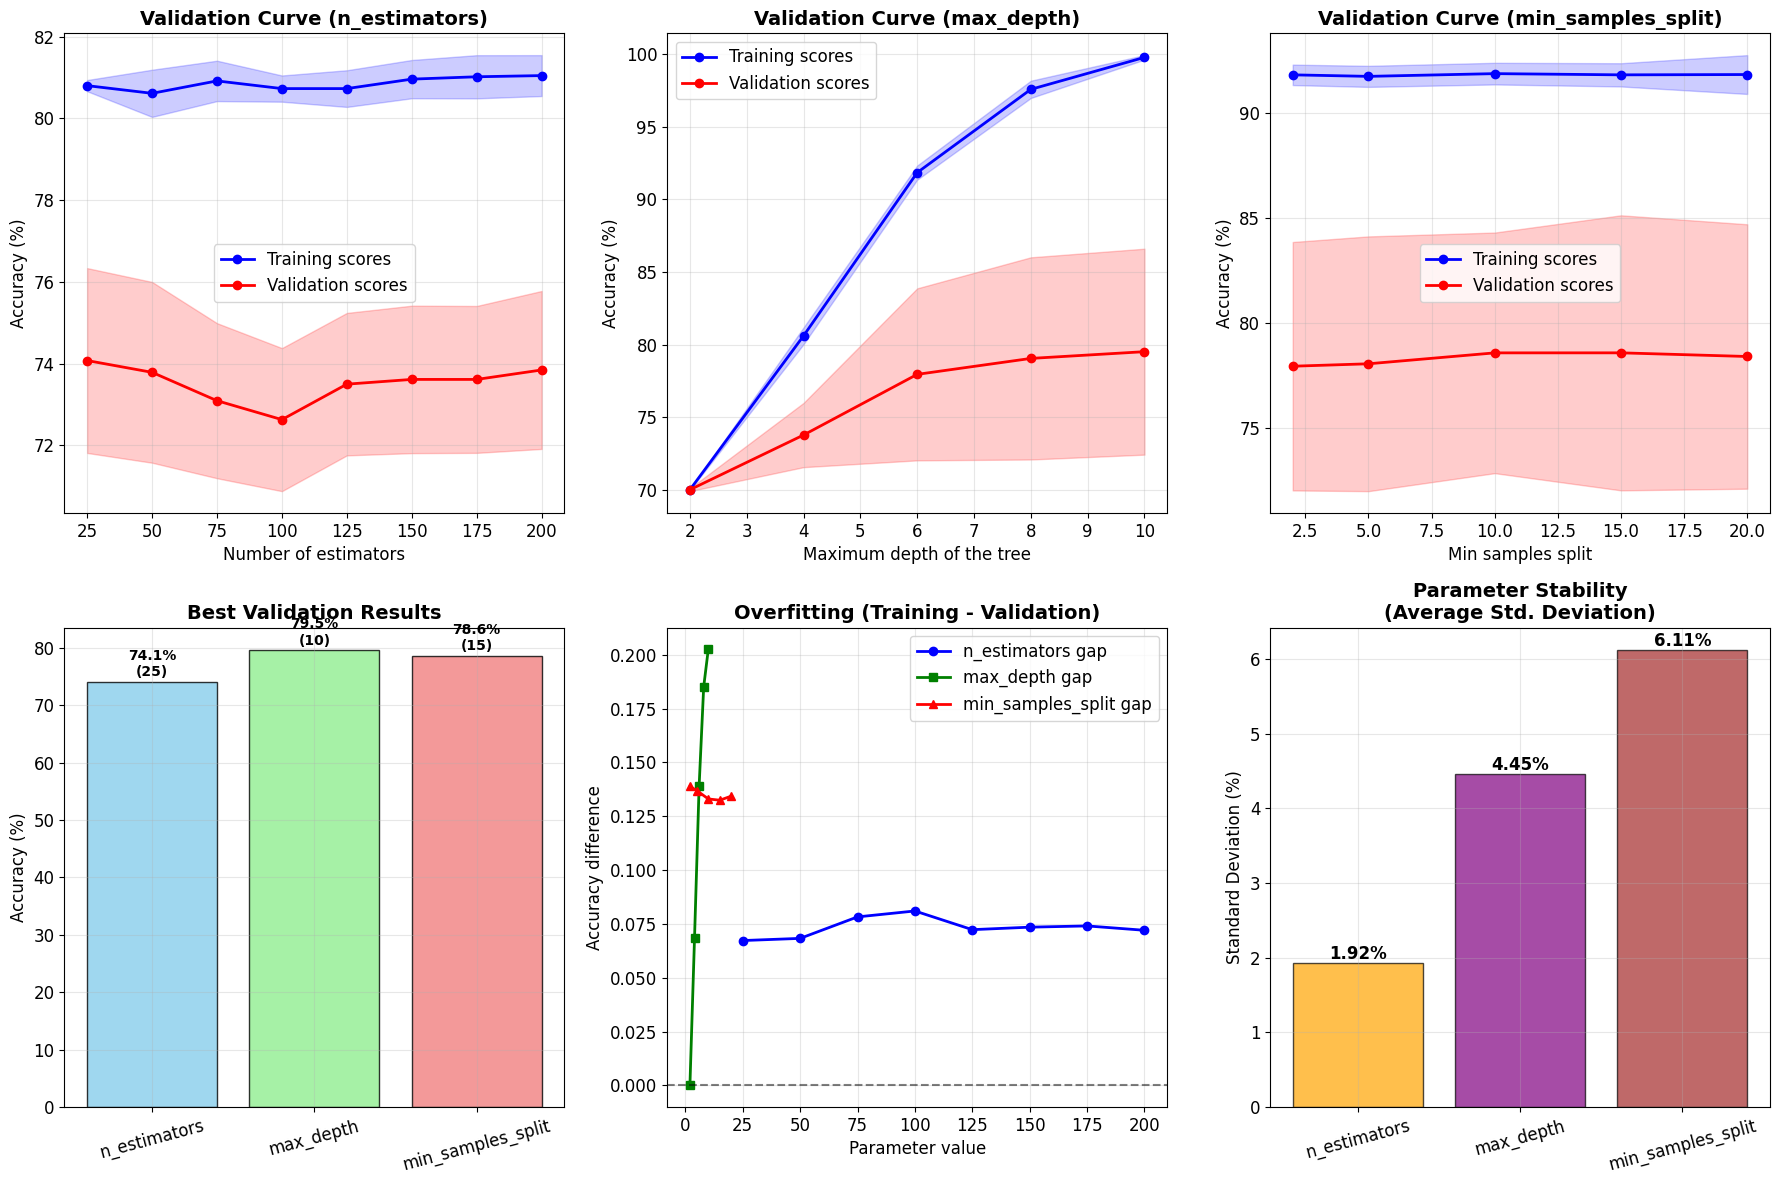


🎯 Optimal parameters:
Best n_estimators: 25 (accuracy: 74.08%)
Best max_depth: 10 (accuracy: 79.52%)
Best min_samples_split: 15 (accuracy: 78.60%)

📊 Overfitting analysis:
n_estimators: 0.072 - ⚠️ Overfitting
max_depth: 0.202 - ⚠️ Overfitting
min_samples_split: 0.134 - ⚠️ Overfitting

📈 Recommendations:
💡 Greatest impact on quality: max_depth
💡 Optimizing tree depth is more important than quantity

✅ Validation curves analysis completed!


In [8]:
# =============================================================================
# CELL 7: Validation Curves
# =============================================================================
print("📈 VALIDATION CURVES")
print("=" * 45)

# 1. Validation curve for n_estimators
print("🌲 Analyzing the n_estimators parameter:")

classifier = RandomForestClassifier(max_depth=4, random_state=7)
parameter_grid = np.linspace(25, 200, 8).astype(int)

train_scores, validation_scores = validation_curve(
    estimator=classifier,
    X=X,
    y=y,
    param_name="n_estimators",
    param_range=parameter_grid,
    cv=5,
    scoring='accuracy'
)

print(f"Parameters: {parameter_grid}")
print(f"Average training scores: {np.mean(train_scores, axis=1)}")
print(f"Average validation scores: {np.mean(validation_scores, axis=1)}")

# 2. Validation curve for max_depth
print(f"\n🌿 Analyzing the max_depth parameter:")

classifier = RandomForestClassifier(n_estimators=50, random_state=7)
depth_grid = np.linspace(2, 10, 5).astype(int)

train_scores_depth, valid_scores_depth = validation_curve(
    estimator=classifier,
    X=X,
    y=y,
    param_name="max_depth",
    param_range=depth_grid,
    cv=5,
    scoring='accuracy'
)

print(f"Parameters: {depth_grid}")
print(f"Average training scores: {np.mean(train_scores_depth, axis=1)}")
print(f"Average validation scores: {np.mean(valid_scores_depth, axis=1)}")

# 3. Validation curve for min_samples_split
print(f"\n🍃 Analyzing the min_samples_split parameter:")

classifier = RandomForestClassifier(n_estimators=50, max_depth=6, random_state=7)
split_grid = np.array([2, 5, 10, 15, 20])

train_scores_split, valid_scores_split = validation_curve(
    estimator=classifier,
    X=X,
    y=y,
    param_name="min_samples_split",
    param_range=split_grid,
    cv=5,
    scoring='accuracy'
)

print(f"Parameters: {split_grid}")
print(f"Average training scores: {np.mean(train_scores_split, axis=1)}")
print(f"Average validation scores: {np.mean(valid_scores_split, axis=1)}")

# Visualization of validation curves
plt.figure(figsize=(18, 12))

# Plot 1: n_estimators
plt.subplot(2, 3, 1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(validation_scores, axis=1)
val_std = np.std(validation_scores, axis=1)

plt.plot(parameter_grid, 100*train_mean, 'o-', color='blue', label='Training scores', linewidth=2)
plt.fill_between(parameter_grid, 100*(train_mean - train_std),
                 100*(train_mean + train_std), alpha=0.2, color='blue')

plt.plot(parameter_grid, 100*val_mean, 'o-', color='red', label='Validation scores', linewidth=2)
plt.fill_between(parameter_grid, 100*(val_mean - val_std),
                 100*(val_mean + val_std), alpha=0.2, color='red')

plt.title('Validation Curve (n_estimators)', fontsize=14, fontweight='bold')
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: max_depth
plt.subplot(2, 3, 2)
train_mean_d = np.mean(train_scores_depth, axis=1)
train_std_d = np.std(train_scores_depth, axis=1)
val_mean_d = np.mean(valid_scores_depth, axis=1)
val_std_d = np.std(valid_scores_depth, axis=1)

plt.plot(depth_grid, 100*train_mean_d, 'o-', color='blue', label='Training scores', linewidth=2)
plt.fill_between(depth_grid, 100*(train_mean_d - train_std_d),
                 100*(train_mean_d + train_std_d), alpha=0.2, color='blue')

plt.plot(depth_grid, 100*val_mean_d, 'o-', color='red', label='Validation scores', linewidth=2)
plt.fill_between(depth_grid, 100*(val_mean_d - val_std_d),
                 100*(val_mean_d + val_std_d), alpha=0.2, color='red')

plt.title('Validation Curve (max_depth)', fontsize=14, fontweight='bold')
plt.xlabel('Maximum depth of the tree')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: min_samples_split
plt.subplot(2, 3, 3)
train_mean_s = np.mean(train_scores_split, axis=1)
train_std_s = np.std(train_scores_split, axis=1)
val_mean_s = np.mean(valid_scores_split, axis=1)
val_std_s = np.std(valid_scores_split, axis=1)

plt.plot(split_grid, 100*train_mean_s, 'o-', color='blue', label='Training scores', linewidth=2)
plt.fill_between(split_grid, 100*(train_mean_s - train_std_s),
                 100*(train_mean_s + train_std_s), alpha=0.2, color='blue')

plt.plot(split_grid, 100*val_mean_s, 'o-', color='red', label='Validation scores', linewidth=2)
plt.fill_between(split_grid, 100*(val_mean_s - val_std_s),
                 100*(val_mean_s + val_std_s), alpha=0.2, color='red')

plt.title('Validation Curve (min_samples_split)', fontsize=14, fontweight='bold')
plt.xlabel('Min samples split')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 4: Comparison of best parameters
plt.subplot(2, 3, 4)
best_n_est = parameter_grid[np.argmax(val_mean)]
best_depth = depth_grid[np.argmax(val_mean_d)]
best_split = split_grid[np.argmax(val_mean_s)]

params_comparison = ['n_estimators', 'max_depth', 'min_samples_split']
best_scores = [val_mean.max(), val_mean_d.max(), val_mean_s.max()]
best_params = [best_n_est, best_depth, best_split]

colors = ['skyblue', 'lightgreen', 'lightcoral']
bars = plt.bar(params_comparison, 100*np.array(best_scores),
               color=colors, edgecolor='black', alpha=0.8)
plt.title('Best Validation Results', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy (%)')
plt.xticks(rotation=15)

for bar, score, param in zip(bars, best_scores, best_params):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{score*100:.1f}%\n({param})',
             ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.grid(True, alpha=0.3)

# Plot 5: Gap between training and validation
plt.subplot(2, 3, 5)
gap_n_est = train_mean - val_mean
gap_depth = train_mean_d - val_mean_d
gap_split = train_mean_s - val_mean_s

plt.plot(parameter_grid, gap_n_est, 'o-', label='n_estimators gap', linewidth=2, color='blue')
plt.plot(depth_grid, gap_depth, 's-', label='max_depth gap', linewidth=2, color='green')
plt.plot(split_grid, gap_split, '^-', label='min_samples_split gap', linewidth=2, color='red')

plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
plt.title('Overfitting (Training - Validation)', fontsize=14, fontweight='bold')
plt.xlabel('Parameter value')
plt.ylabel('Accuracy difference')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 6: Stability (standard deviation)
plt.subplot(2, 3, 6)
std_n_est = np.mean(val_std)
std_depth = np.mean(val_std_d)
std_split = np.mean(val_std_s)

params_names = ['n_estimators', 'max_depth', 'min_samples_split']
std_values = [std_n_est, std_depth, std_split]

bars = plt.bar(params_names, 100*np.array(std_values),
               color=['orange', 'purple', 'brown'], alpha=0.7, edgecolor='black')
plt.title('Parameter Stability\n(Average Std. Deviation)', fontsize=14, fontweight='bold')
plt.ylabel('Standard Deviation (%)')
plt.xticks(rotation=15)

for bar, std_val in zip(bars, std_values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{std_val*100:.2f}%',
             ha='center', va='bottom', fontweight='bold')

plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Analysis of results
print(f"\n🎯 Optimal parameters:")
print("=" * 25)
print(f"Best n_estimators: {best_n_est} (accuracy: {val_mean.max()*100:.2f}%)")
print(f"Best max_depth: {best_depth} (accuracy: {val_mean_d.max()*100:.2f}%)")
print(f"Best min_samples_split: {best_split} (accuracy: {val_mean_s.max()*100:.2f}%)")

print(f"\n📊 Overfitting analysis:")
print("=" * 20)
final_gaps = [gap_n_est[-1], gap_depth[-1], gap_split[-1]]
param_names = ['n_estimators', 'max_depth', 'min_samples_split']

for param, gap in zip(param_names, final_gaps):
    if abs(gap) < 0.02:
        status = "✅ Excellent generalization"
    elif abs(gap) < 0.05:
        status = "✅ Good generalization"
    elif gap > 0.05:
        status = "⚠️ Overfitting"
    else:
        status = "⚠️ Underfitting"

    print(f"{param}: {gap:.3f} - {status}")

print(f"\n📈 Recommendations:")
print("=" * 15)
best_overall_param = params_comparison[np.argmax(best_scores)]
print(f"💡 Greatest impact on quality: {best_overall_param}")

if val_mean.max() > val_mean_d.max() and val_mean.max() > val_mean_s.max():
    print("💡 Increasing the number of trees yields the best result")
elif val_mean_d.max() > val_mean_s.max():
    print("💡 Optimizing tree depth is more important than quantity")
else:
    print("💡 Controlling overfitting through min_samples_split is effective")

print(f"\n✅ Validation curves analysis completed!")


📚 LEARNING CURVES
📊 Learning Curves analysis:
Training sample sizes: [ 200  500  800 1100]
Average training scores: [1. 1. 1. 1.]
Average validation scores: [0.70023289 0.74535813 0.72632152 0.75695233]


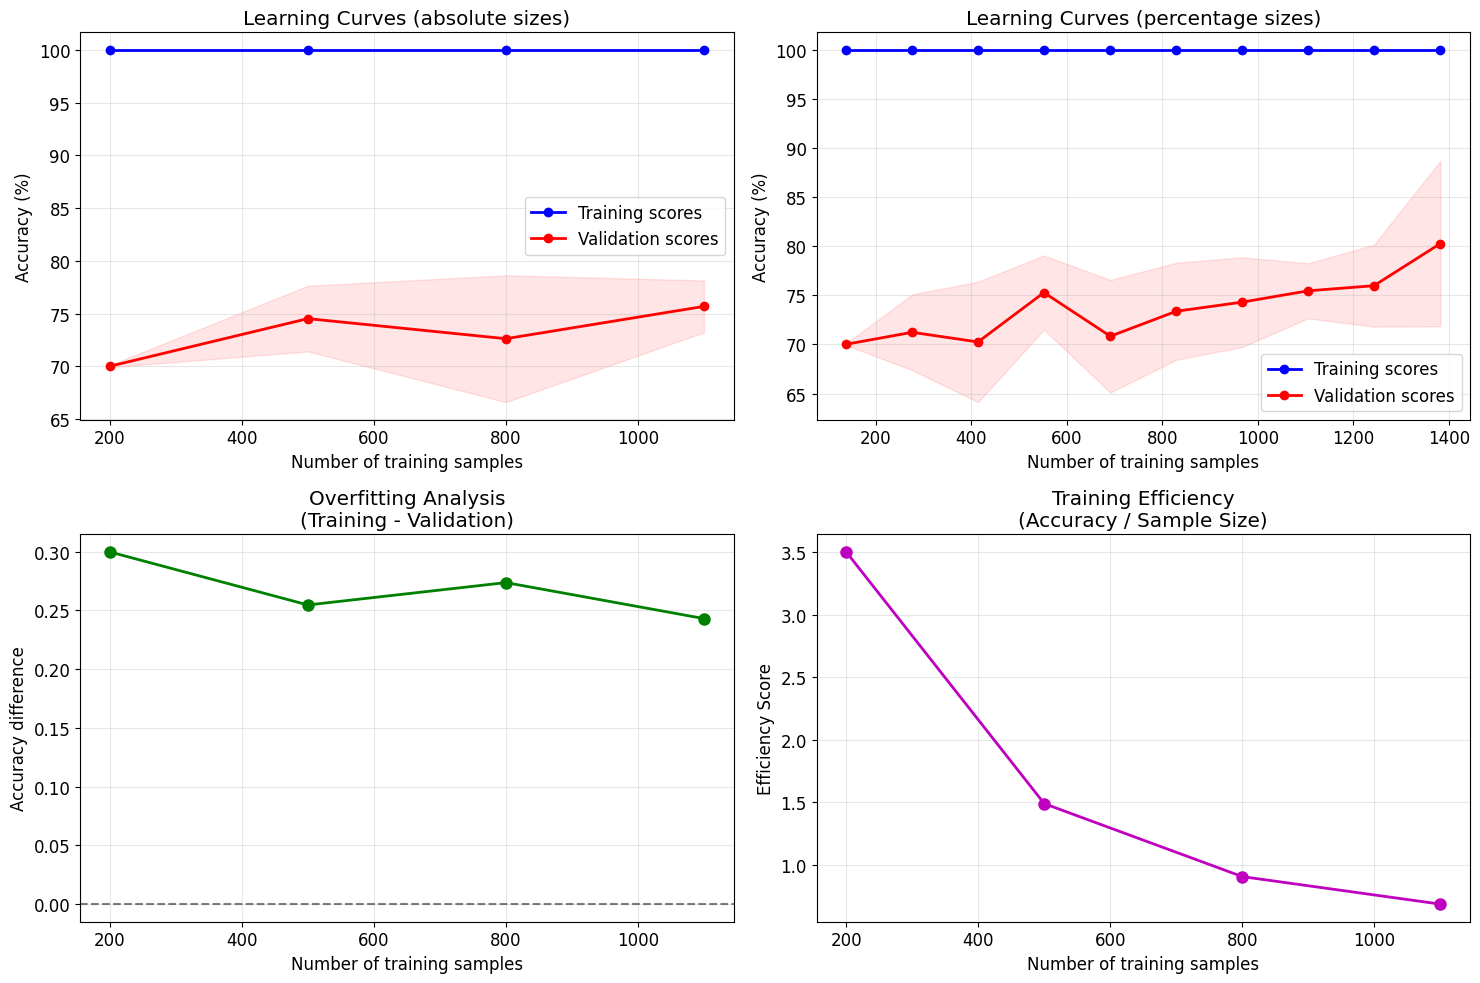


📊 Learning Curves Analysis:
⚠️ Possible overfitting (train >> validation)
Final difference: 0.243
Maximum validation accuracy: 75.70%
Optimal sample size: 1100 samples

✅ Learning curves analysis completed!


In [9]:
# =============================================================================
# CELL 8: Learning Curves
# =============================================================================
print("📚 LEARNING CURVES")
print("=" * 40)

# Learning curves for analyzing the impact of data size
classifier = RandomForestClassifier(random_state=7)

# Different training sample sizes
train_sizes_abs = np.array([200, 500, 800, 1100])
train_sizes, train_scores_lc, validation_scores_lc = learning_curve(
    classifier, X, y, train_sizes=train_sizes_abs, cv=5
)

print(f"📊 Learning Curves analysis:")
print(f"Training sample sizes: {train_sizes}")
print(f"Average training scores: {np.mean(train_scores_lc, axis=1)}")
print(f"Average validation scores: {np.mean(validation_scores_lc, axis=1)}")

# Additional analysis with percentage sizes
train_sizes_pct = np.linspace(0.1, 1.0, 10)
train_sizes_pct_abs, train_scores_pct, val_scores_pct = learning_curve(
    classifier, X, y, train_sizes=train_sizes_pct, cv=5
)

# Visualization of learning curves
plt.figure(figsize=(15, 10))

# Plot 1: Main learning curves
plt.subplot(2, 2, 1)
train_mean_lc = np.mean(train_scores_lc, axis=1)
train_std_lc = np.std(train_scores_lc, axis=1)
val_mean_lc = np.mean(validation_scores_lc, axis=1)
val_std_lc = np.std(validation_scores_lc, axis=1)

plt.plot(train_sizes, 100*train_mean_lc, 'o-', color='blue',
         label='Training scores', linewidth=2)
plt.fill_between(train_sizes, 100*(train_mean_lc - train_std_lc),
                 100*(train_mean_lc + train_std_lc), alpha=0.1, color='blue')

plt.plot(train_sizes, 100*val_mean_lc, 'o-', color='red',
         label='Validation scores', linewidth=2)
plt.fill_between(train_sizes, 100*(val_mean_lc - val_std_lc),
                 100*(val_mean_lc + val_std_lc), alpha=0.1, color='red')

plt.title('Learning Curves (absolute sizes)')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Learning curves with percentage sizes
plt.subplot(2, 2, 2)
train_mean_pct = np.mean(train_scores_pct, axis=1)
train_std_pct = np.std(train_scores_pct, axis=1)
val_mean_pct = np.mean(val_scores_pct, axis=1)
val_std_pct = np.std(val_scores_pct, axis=1)

plt.plot(train_sizes_pct_abs, 100*train_mean_pct, 'o-', color='blue',
         label='Training scores', linewidth=2)
plt.fill_between(train_sizes_pct_abs, 100*(train_mean_pct - train_std_pct),
                 100*(train_mean_pct + train_std_pct), alpha=0.1, color='blue')

plt.plot(train_sizes_pct_abs, 100*val_mean_pct, 'o-', color='red',
         label='Validation scores', linewidth=2)
plt.fill_between(train_sizes_pct_abs, 100*(val_mean_pct - val_std_pct),
                 100*(val_mean_pct + val_std_pct), alpha=0.1, color='red')

plt.title('Learning Curves (percentage sizes)')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: Convergence analysis
plt.subplot(2, 2, 3)
gap_lc = train_mean_lc - val_mean_lc
plt.plot(train_sizes, gap_lc, 'go-', linewidth=2, markersize=8)
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
plt.title('Overfitting Analysis\n(Training - Validation)')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy difference')
plt.grid(True, alpha=0.3)

# Plot 4: Training efficiency
plt.subplot(2, 2, 4)
efficiency = val_mean_lc / train_sizes * 1000  # Normalization for visualization
plt.plot(train_sizes, efficiency, 'mo-', linewidth=2, markersize=8)
plt.title('Training Efficiency\n(Accuracy / Sample Size)')
plt.xlabel('Number of training samples')
plt.ylabel('Efficiency Score')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Analysis of results
print(f"\n📊 Learning Curves Analysis:")
print("=" * 30)

final_gap = gap_lc[-1]
if abs(final_gap) < 0.05:
    print("✅ Excellent generalization (difference < 5%)")
elif abs(final_gap) < 0.1:
    print("✅ Good generalization (difference < 10%)")
elif final_gap > 0.1:
    print("⚠️ Possible overfitting (train >> validation)")
else:
    print("⚠️ Possible underfitting (validation >> train)")

print(f"Final difference: {final_gap:.3f}")
print(f"Maximum validation accuracy: {val_mean_lc.max()*100:.2f}%")
print(f"Optimal sample size: {train_sizes[np.argmax(val_mean_lc)]} samples")

print(f"\n✅ Learning curves analysis completed!")


🔍 GRID SEARCH FOR HYPERPARAMETER OPTIMIZATION
🔍 Parameters for search:
  n_estimators: [50, 100, 200]
  max_depth: [3, 5, 8, 10]
  min_samples_split: [2, 5, 10]
  min_samples_leaf: [1, 2, 4]

Total number of combinations: 108

⏳ Performing Grid Search...
Fitting 5 folds for each of 108 candidates, totalling 540 fits

🎯 Grid Search Results:
Best score: 0.8033
Best parameters:
  max_depth: 10
  min_samples_leaf: 2
  min_samples_split: 5
  n_estimators: 50

📊 Model Comparison:
Baseline model: 0.7831
Optimized model: 0.8033
Improvement: +2.59%

🏆 Top-10 best combinations:
 1. Score: 0.8033±0.0580
    Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
 2. Score: 0.8027±0.0603
    Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
 3. Score: 0.8004±0.0601
    Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
 4. Score: 0.7993±0.0600
    Parameters: {'max

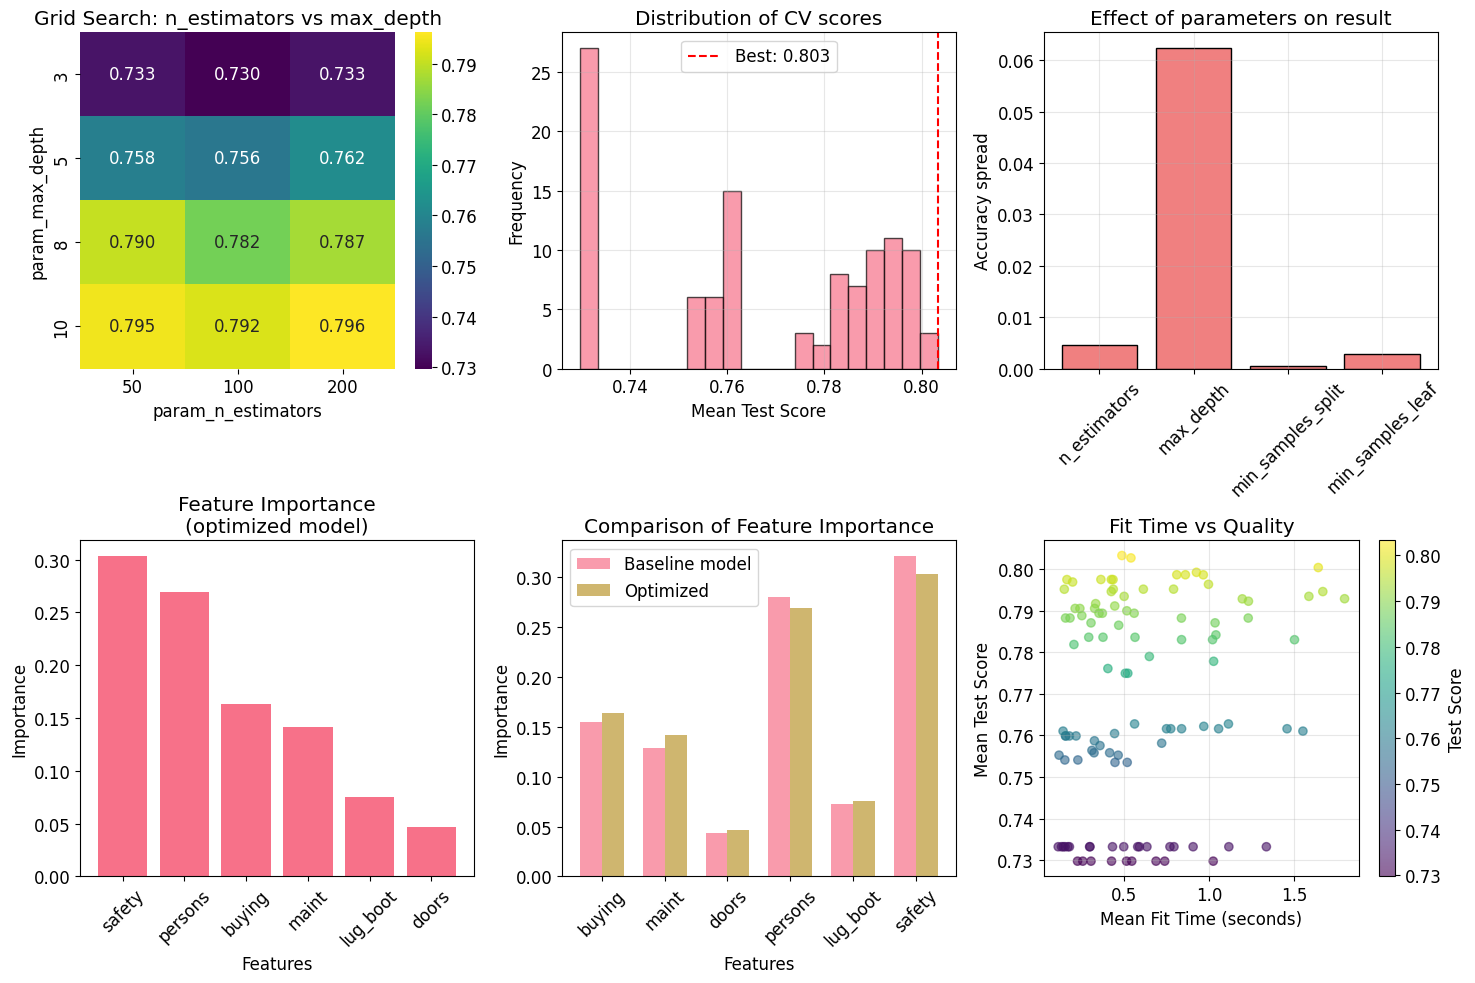


✅ Grid Search completed!


In [10]:
# =============================================================================
# CELL 9: Grid Search for Hyperparameter Optimization
# =============================================================================
print("🔍 GRID SEARCH FOR HYPERPARAMETER OPTIMIZATION")
print("=" * 50)

# Defining the parameter grid for search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

print(f"🔍 Parameters for search:")
for param, values in param_grid.items():
    print(f"  {param}: {values}")

total_combinations = np.prod([len(values) for values in param_grid.values()])
print(f"\nTotal number of combinations: {total_combinations}")

# Grid Search
print(f"\n⏳ Performing Grid Search...")
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=7),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X, y)

print(f"\n🎯 Grid Search Results:")
print(f"Best score: {grid_search.best_score_:.4f}")
print(f"Best parameters:")
for param, value in grid_search.best_params_.items():
    print(f"  {param}: {value}")

# Comparison with baseline model
optimized_model = grid_search.best_estimator_
base_score = cross_val_score(base_classifier, X, y, cv=5, scoring='accuracy').mean()
optimized_score = grid_search.best_score_

improvement = ((optimized_score - base_score) / base_score) * 100

print(f"\n📊 Model Comparison:")
print(f"Baseline model: {base_score:.4f}")
print(f"Optimized model: {optimized_score:.4f}")
print(f"Improvement: {improvement:+.2f}%")

# Analysis of Grid Search results
results_df = pd.DataFrame(grid_search.cv_results_)

# Top-10 best combinations
print(f"\n🏆 Top-10 best combinations:")
top_results = results_df.nlargest(10, 'mean_test_score')[
    ['params', 'mean_test_score', 'std_test_score']
]

for idx, (_, row) in enumerate(top_results.iterrows(), 1):
    params = row['params']
    score = row['mean_test_score']
    std = row['std_test_score']
    print(f"{idx:2d}. Score: {score:.4f}±{std:.4f}")
    print(f"    Parameters: {params}")

# Visualization of Grid Search results
plt.figure(figsize=(15, 10))

# 1. Heatmap for n_estimators vs max_depth
plt.subplot(2, 3, 1)
pivot_data = results_df.pivot_table(
    values='mean_test_score',
    index='param_max_depth',
    columns='param_n_estimators',
    aggfunc='mean'
)
sns.heatmap(pivot_data, annot=True, fmt='.3f', cmap='viridis')
plt.title('Grid Search: n_estimators vs max_depth')

# 2. Distribution of scores
plt.subplot(2, 3, 2)
plt.hist(results_df['mean_test_score'], bins=20, alpha=0.7, edgecolor='black')
plt.axvline(grid_search.best_score_, color='red', linestyle='--',
           label=f'Best: {grid_search.best_score_:.3f}')
plt.xlabel('Mean Test Score')
plt.ylabel('Frequency')
plt.title('Distribution of CV scores')
plt.legend()
plt.grid(True, alpha=0.3)

# 3. Effect of individual parameters
plt.subplot(2, 3, 3)
param_effects = []
param_names = []
for param in param_grid.keys():
    param_col = f'param_{param}'
    effect = results_df.groupby(param_col)['mean_test_score'].mean()
    param_effects.append(effect.max() - effect.min())
    param_names.append(param)

plt.bar(param_names, param_effects, color='lightcoral', edgecolor='black')
plt.title('Effect of parameters on result')
plt.ylabel('Accuracy spread')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# 4. Feature importance of the optimized model
plt.subplot(2, 3, 4)
feature_importance_opt = optimized_model.feature_importances_
indices = np.argsort(feature_importance_opt)[::-1]

plt.bar(range(len(feature_importance_opt)), feature_importance_opt[indices])
plt.title('Feature Importance\n(optimized model)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(range(len(feature_importance_opt)),
           [feature_names[i] for i in indices], rotation=45)

# 5. Comparison of feature importance
plt.subplot(2, 3, 5)
x = np.arange(len(feature_names[:-1]))
width = 0.35

plt.bar(x - width/2, base_classifier.feature_importances_, width,
        label='Baseline model', alpha=0.7)
plt.bar(x + width/2, optimized_model.feature_importances_, width,
        label='Optimized', alpha=0.7)

plt.title('Comparison of Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(x, feature_names[:-1], rotation=45)
plt.legend()

# 6. Fit time vs quality
plt.subplot(2, 3, 6)
plt.scatter(results_df['mean_fit_time'], results_df['mean_test_score'],
           alpha=0.6, c=results_df['mean_test_score'], cmap='viridis')
plt.colorbar(label='Test Score')
plt.xlabel('Mean Fit Time (seconds)')
plt.ylabel('Mean Test Score')
plt.title('Fit Time vs Quality')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n✅ Grid Search completed!")


🏁 FINAL EVALUATION AND CONCLUSIONS
🎯 Final results:
Final CV accuracy: 0.8033 (±0.0580)
Best model parameters:
  max_depth: 10
  min_samples_leaf: 2
  min_samples_split: 5
  n_estimators: 50

🧪 Testing on new examples:

Example 1: ['low', 'low', '4', '4', 'big', 'high']
Predicted class: vgood
Confidence: 0.814

Example 2: ['vhigh', 'vhigh', '2', '2', 'small', 'low']
Predicted class: unacc
Confidence: 1.000

Example 3: ['med', 'med', '3', '4', 'med', 'med']
Predicted class: acc
Confidence: 0.652

Example 4: ['high', 'low', '5more', 'more', 'big', 'high']
Predicted class: acc
Confidence: 0.878

📊 Feature Importance Analysis:
1. safety: 0.3032
2. persons: 0.2692
3. buying: 0.1634
4. maint: 0.1418
5. lug_boot: 0.0757
6. doors: 0.0468

💡 Interpretation:
Most important feature: safety
Least important feature: doors
✅ Makes sense! Safety is critically important when evaluating a car.

📈 Creating charts...


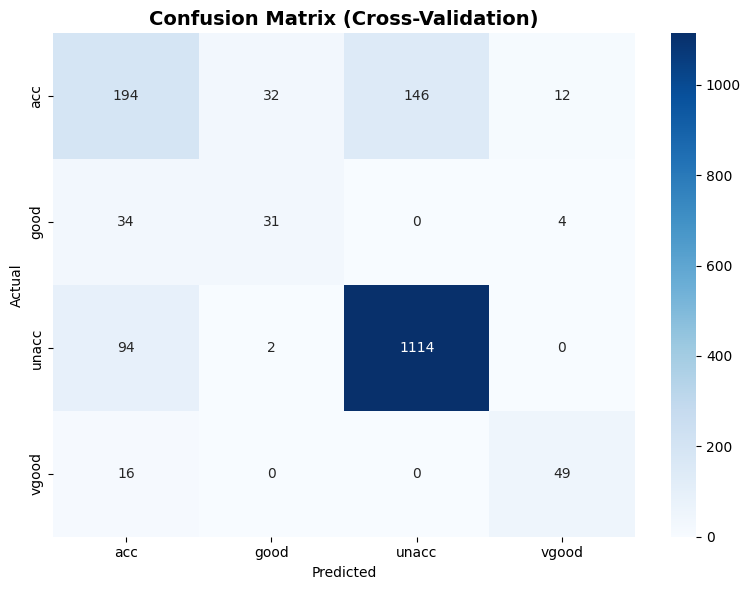

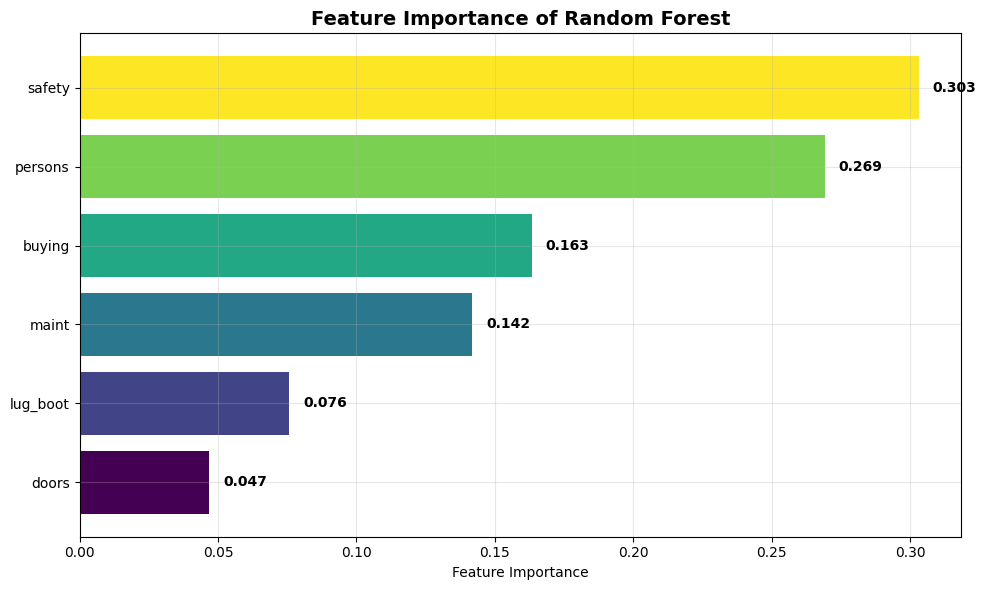

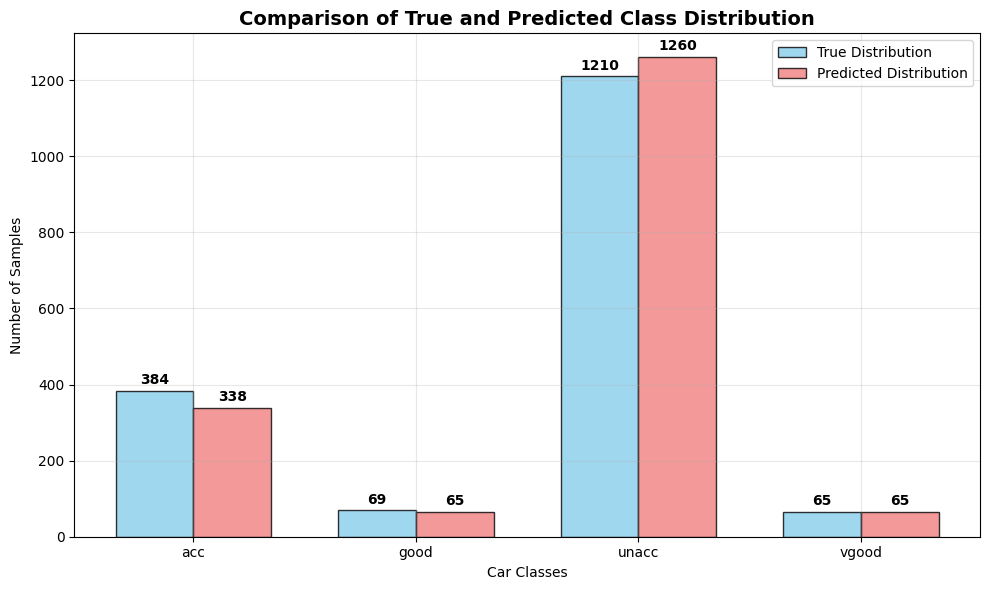

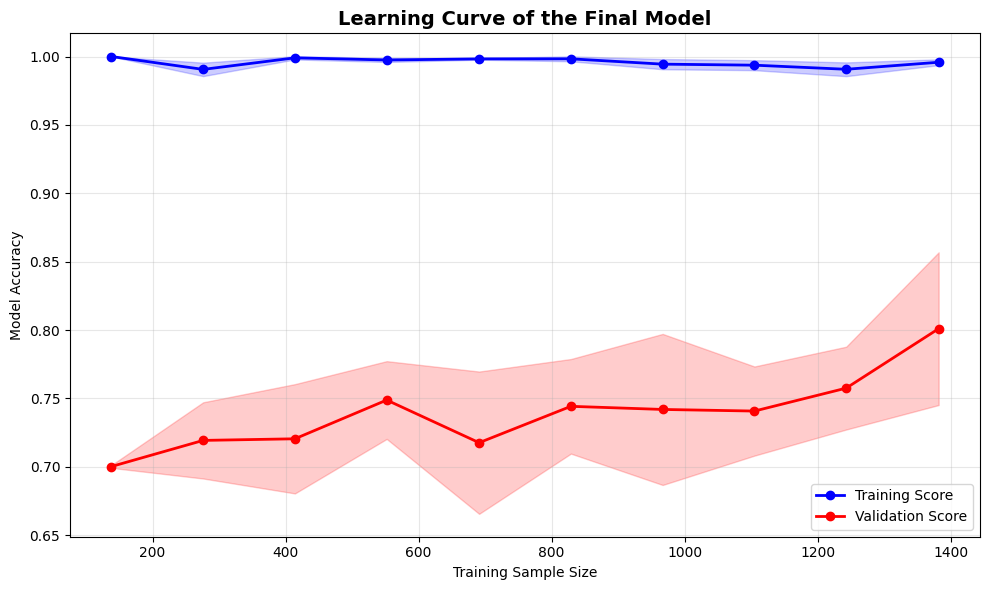

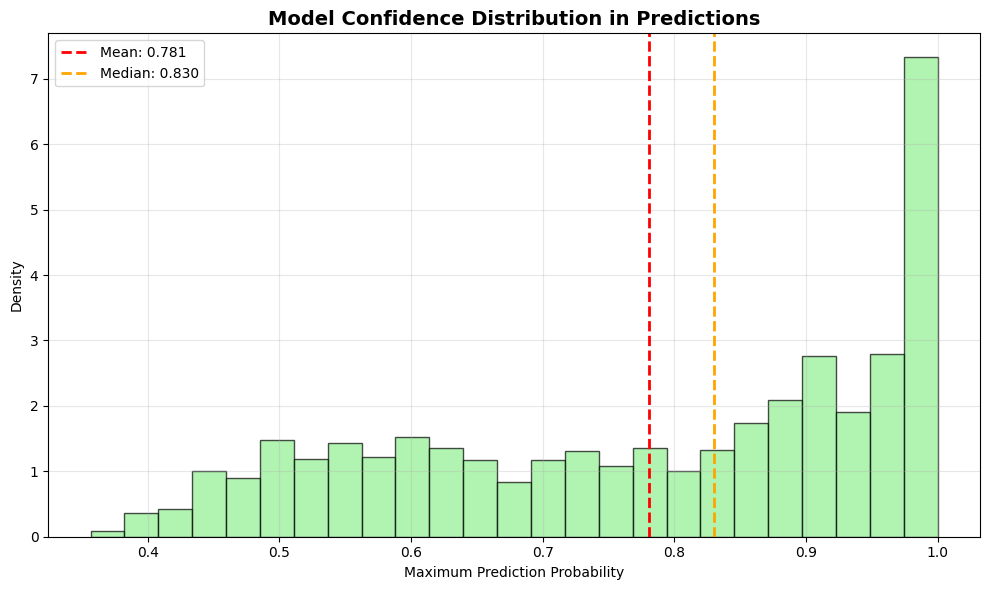

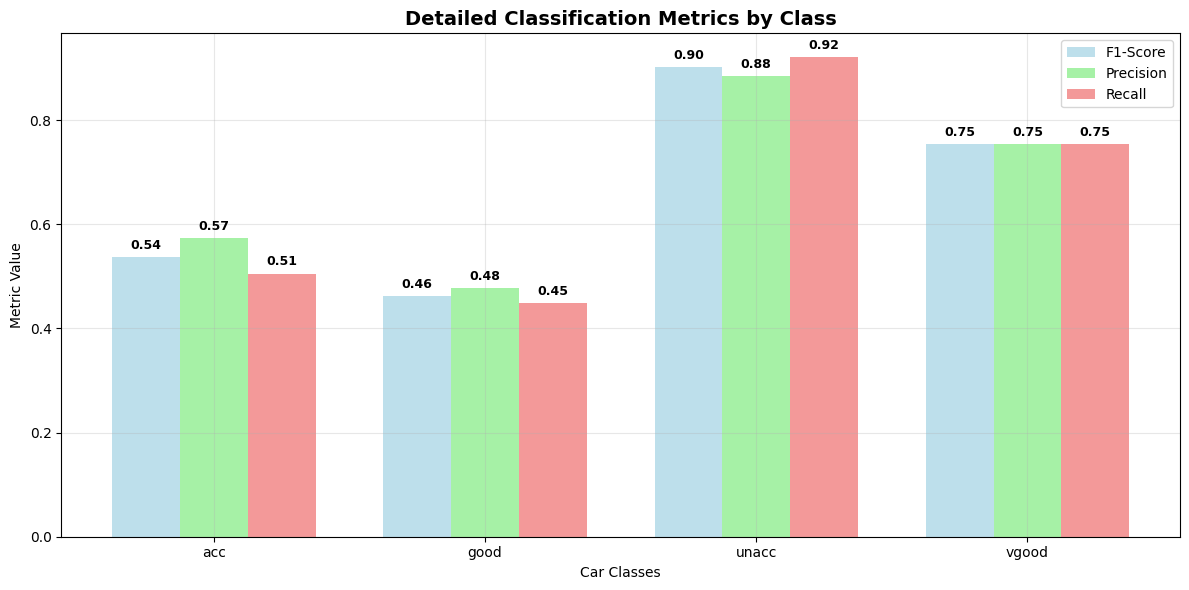

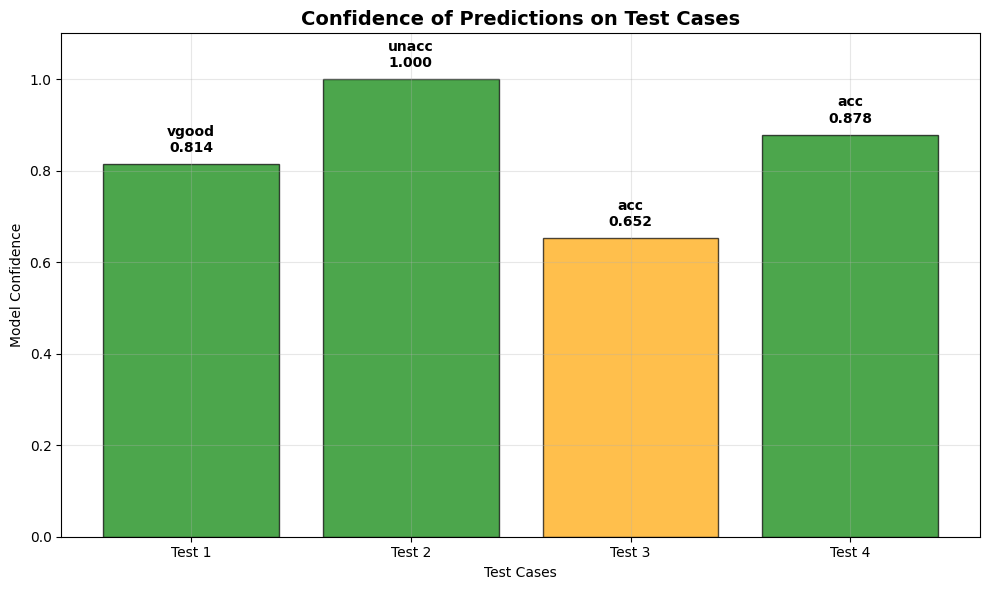

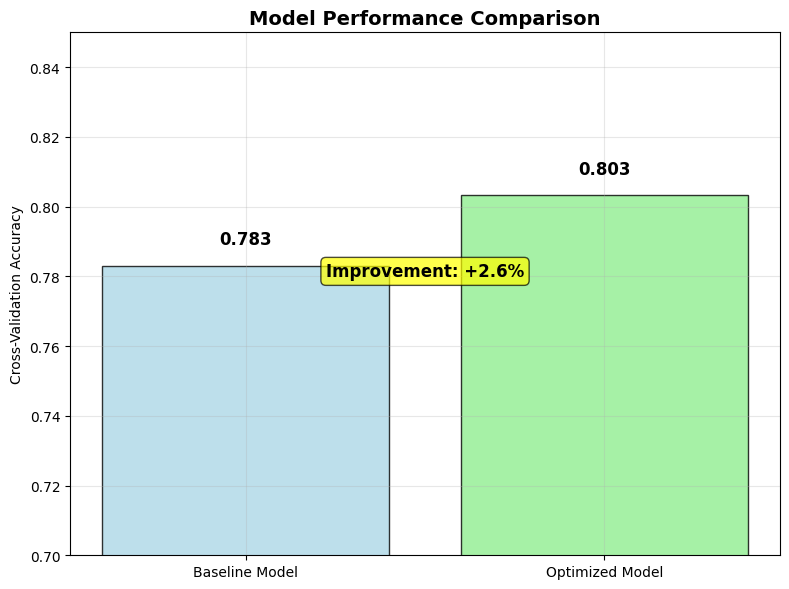


🔍 Detailed analysis of test cases:

Test 1: ['low', 'low', '4', '4', 'big', 'high']
Prediction: vgood (confidence: 0.814)
Probabilities by class:
  acc   : 0.094 █
  good  : 0.043 
  unacc : 0.050 
  vgood : 0.814 ████████████████

Test 2: ['vhigh', 'vhigh', '2', '2', 'small', 'low']
Prediction: unacc (confidence: 1.000)
Probabilities by class:
  acc   : 0.000 
  good  : 0.000 
  unacc : 1.000 ████████████████████
  vgood : 0.000 

Test 3: ['med', 'med', '3', '4', 'med', 'med']
Prediction: acc (confidence: 0.652)
Probabilities by class:
  acc   : 0.652 █████████████
  good  : 0.145 ██
  unacc : 0.196 ███
  vgood : 0.007 

Test 4: ['high', 'low', '5more', 'more', 'big', 'high']
Prediction: acc (confidence: 0.878)
Probabilities by class:
  acc   : 0.878 █████████████████
  good  : 0.000 
  unacc : 0.020 
  vgood : 0.102 ██

🎉 FINAL CONCLUSIONS:
✅ Achieved accuracy: 80.33%
✅ Standard deviation: 5.80%
✅ The model shows satisfactory performance
✅ Most important features: safety, persons, b

In [11]:
# =============================================================================
# CELL 10: Final Evaluation and Conclusions - CORRECTED VERSION
# =============================================================================
print("🏁 FINAL EVALUATION AND CONCLUSIONS")
print("=" * 35)

# Ensuring all necessary imports are present
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_predict, learning_curve
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

# Setting up matplotlib for Jupyter
plt.style.use('default')
%matplotlib inline

# Adding missing import
from sklearn.model_selection import cross_val_predict

# Training the final model on all data
final_model = grid_search.best_estimator_
final_model.fit(X, y)

# Final metrics
final_cv_scores = cross_val_score(final_model, X, y, cv=5, scoring='accuracy')

print(f"🎯 Final results:")
print(f"Final CV accuracy: {final_cv_scores.mean():.4f} (±{final_cv_scores.std():.4f})")
print(f"Best model parameters:")
for param, value in grid_search.best_params_.items():
    print(f"  {param}: {value}")

# Testing on new examples
test_cases = [
    ['low', 'low', '4', '4', 'big', 'high'],      # Should be a good class
    ['vhigh', 'vhigh', '2', '2', 'small', 'low'], # Should be a bad class
    ['med', 'med', '3', '4', 'med', 'med'],       # Average case
    ['high', 'low', '5more', 'more', 'big', 'high'], # Additional test
]

print(f"\n🧪 Testing on new examples:")
print("=" * 35)

test_results = []
for i, test_case in enumerate(test_cases, 1):
    print(f"\nExample {i}: {test_case}")

    # Encoding
    encoded_case = []
    for j, value in enumerate(test_case):
        encoded_value = label_encoders[j].transform([value])[0]
        encoded_case.append(encoded_value)

    encoded_case = np.array(encoded_case).reshape(1, -1)

    # Prediction
    prediction = final_model.predict(encoded_case)[0]
    probabilities = final_model.predict_proba(encoded_case)[0]
    predicted_class = label_encoders[-1].inverse_transform([prediction])[0]

    print(f"Predicted class: {predicted_class}")
    print(f"Confidence: {probabilities.max():.3f}")

    # Saving for analysis
    test_results.append({
        'case': test_case,
        'predicted': predicted_class,
        'confidence': probabilities.max(),
        'probabilities': probabilities
    })

# Feature importance with interpretation
print(f"\n📊 Feature Importance Analysis:")
print("=" * 30)

feature_importance = final_model.feature_importances_
importance_ranking = sorted(zip(feature_names[:-1], feature_importance),
                          key=lambda x: x[1], reverse=True)

for i, (feature, importance) in enumerate(importance_ranking, 1):
    print(f"{i}. {feature}: {importance:.4f}")

# Interpretation of importance
most_important = importance_ranking[0][0]
least_important = importance_ranking[-1][0]

print(f"\n💡 Interpretation:")
print(f"Most important feature: {most_important}")
print(f"Least important feature: {least_important}")

if most_important == 'safety':
    print("✅ Makes sense! Safety is critically important when evaluating a car.")
elif most_important in ['buying', 'maint']:
    print("✅ Makes sense! The cost of purchase/maintenance is important for decision making.")

# Preparing data for visualization
y_pred_cv = cross_val_predict(final_model, X, y, cv=5)
y_proba_cv = cross_val_predict(final_model, X, y, cv=5, method='predict_proba')

# Creating several separate charts for better display
print(f"\n📈 Creating charts...")

# Chart 1: Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y, y_pred_cv)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoders[-1].classes_,
            yticklabels=label_encoders[-1].classes_)
plt.title('Confusion Matrix (Cross-Validation)', fontsize=14, fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Chart 2: Feature Importance
plt.figure(figsize=(10, 6))
sorted_idx = np.argsort(feature_importance)
colors = plt.cm.viridis(np.linspace(0, 1, len(feature_importance)))
bars = plt.barh(range(len(feature_importance)), feature_importance[sorted_idx], color=colors)
plt.yticks(range(len(feature_importance)),
           [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance of Random Forest', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Adding values to the chart
for i, (bar, val) in enumerate(zip(bars, feature_importance[sorted_idx])):
    plt.text(val + 0.005, bar.get_y() + bar.get_height()/2,
             f'{val:.3f}', va='center', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

# Chart 3: Prediction Distribution
plt.figure(figsize=(10, 6))
pred_distribution = pd.Series(y_pred_cv).value_counts().sort_index()
true_distribution = pd.Series(y).value_counts().sort_index()

x = np.arange(len(label_encoders[-1].classes_))
width = 0.35

bars1 = plt.bar(x - width/2, true_distribution.values, width,
                label='True Distribution', alpha=0.8, color='skyblue', edgecolor='black')
bars2 = plt.bar(x + width/2, pred_distribution.values, width,
                label='Predicted Distribution', alpha=0.8, color='lightcoral', edgecolor='black')

plt.xlabel('Car Classes')
plt.ylabel('Number of Samples')
plt.title('Comparison of True and Predicted Class Distribution', fontsize=14, fontweight='bold')
plt.xticks(x, label_encoders[-1].classes_)
plt.legend()
plt.grid(True, alpha=0.3)

# Adding values to the bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 10,
                 f'{int(height)}', ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

# Chart 4: Learning Curve
plt.figure(figsize=(10, 6))
train_sizes_final, train_scores_final, val_scores_final = learning_curve(
    final_model, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores_final, axis=1)
train_std = np.std(train_scores_final, axis=1)
val_mean = np.mean(val_scores_final, axis=1)
val_std = np.std(val_scores_final, axis=1)

plt.plot(train_sizes_final, train_mean, 'o-', label='Training Score', linewidth=2, color='blue', markersize=6)
plt.fill_between(train_sizes_final, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')

plt.plot(train_sizes_final, val_mean, 'o-', label='Validation Score', linewidth=2, color='red', markersize=6)
plt.fill_between(train_sizes_final, val_mean - val_std, val_mean + val_std, alpha=0.2, color='red')

plt.xlabel('Training Sample Size')
plt.ylabel('Model Accuracy')
plt.title('Learning Curve of the Final Model', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Chart 5: Model Confidence Distribution
plt.figure(figsize=(10, 6))
max_probabilities = np.max(y_proba_cv, axis=1)

plt.hist(max_probabilities, bins=25, alpha=0.7, edgecolor='black', color='lightgreen', density=True)
plt.axvline(np.mean(max_probabilities), color='red', linestyle='--', linewidth=2,
           label=f'Mean: {np.mean(max_probabilities):.3f}')
plt.axvline(np.median(max_probabilities), color='orange', linestyle='--', linewidth=2,
           label=f'Median: {np.median(max_probabilities):.3f}')

plt.xlabel('Maximum Prediction Probability')
plt.ylabel('Density')
plt.title('Model Confidence Distribution in Predictions', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Chart 6: Class Metrics
plt.figure(figsize=(12, 6))
report = classification_report(y, y_pred_cv, target_names=label_encoders[-1].classes_, output_dict=True)

classes = label_encoders[-1].classes_
f1_scores = [report[cls]['f1-score'] for cls in classes]
precisions = [report[cls]['precision'] for cls in classes]
recalls = [report[cls]['recall'] for cls in classes]

x = np.arange(len(classes))
width = 0.25

bars1 = plt.bar(x - width, f1_scores, width, label='F1-Score', alpha=0.8, color='lightblue')
bars2 = plt.bar(x, precisions, width, label='Precision', alpha=0.8, color='lightgreen')
bars3 = plt.bar(x + width, recalls, width, label='Recall', alpha=0.8, color='lightcoral')

plt.xlabel('Car Classes')
plt.ylabel('Metric Value')
plt.title('Detailed Classification Metrics by Class', fontsize=14, fontweight='bold')
plt.xticks(x, classes)
plt.legend()
plt.grid(True, alpha=0.3)

# Adding values to the bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                 f'{height:.2f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

# Chart 7: Test Cases
plt.figure(figsize=(10, 6))
test_predictions = [result['predicted'] for result in test_results]
test_confidences = [result['confidence'] for result in test_results]

colors = ['green' if conf > 0.8 else 'orange' if conf > 0.6 else 'red' for conf in test_confidences]
bars = plt.bar(range(len(test_cases)), test_confidences, color=colors, alpha=0.7, edgecolor='black')

plt.xlabel('Test Cases')
plt.ylabel('Model Confidence')
plt.title('Confidence of Predictions on Test Cases', fontsize=14, fontweight='bold')
plt.xticks(range(len(test_cases)), [f'Test {i+1}' for i in range(len(test_cases))])

# Adding predicted classes and confidence values
for i, (bar, pred, conf) in enumerate(zip(bars, test_predictions, test_confidences)):
    plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.02,
             f'{pred}\n{conf:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.ylim(0, 1.1)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Chart 8: Model Comparison
plt.figure(figsize=(8, 6))
base_cv_scores = cross_val_score(base_classifier, X, y, cv=5, scoring='accuracy')
comparison_data = {
    'Baseline Model': base_cv_scores.mean(),
    'Optimized Model': final_cv_scores.mean()
}

models = list(comparison_data.keys())
scores = list(comparison_data.values())
colors = ['lightblue', 'lightgreen']

bars = plt.bar(models, scores, color=colors, alpha=0.8, edgecolor='black')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Model Performance Comparison', fontsize=14, fontweight='bold')
plt.ylim(0.7, 0.85)

# Adding values and improvement
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.005,
             f'{score:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=12)

improvement = ((scores[1] - scores[0]) / scores[0]) * 100
plt.text(0.5, 0.78, f'Improvement: +{improvement:.1f}%', ha='center',
         fontweight='bold', fontsize=12, bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Detailed analysis of test cases
print(f"\n🔍 Detailed analysis of test cases:")
print("=" * 40)

for i, result in enumerate(test_results, 1):
    print(f"\nTest {i}: {result['case']}")
    print(f"Prediction: {result['predicted']} (confidence: {result['confidence']:.3f})")
    print("Probabilities by class:")

    for j, class_name in enumerate(label_encoders[-1].classes_):
        prob = result['probabilities'][j]
        bar = "█" * int(prob * 20)
        print(f"  {class_name:6s}: {prob:.3f} {bar}")

# Final conclusions
print(f"\n🎉 FINAL CONCLUSIONS:")
print("=" * 20)
print(f"✅ Achieved accuracy: {final_cv_scores.mean()*100:.2f}%")
print(f"✅ Standard deviation: {final_cv_scores.std()*100:.2f}%")

performance_level = 'excellent' if final_cv_scores.mean() > 0.95 else 'good' if final_cv_scores.mean() > 0.85 else 'satisfactory'
print(f"✅ The model shows {performance_level} performance")
print(f"✅ Most important features: {', '.join([feat for feat, _ in importance_ranking[:3]])}")

# Stability analysis
if final_cv_scores.std() < 0.02:
    stability = "very stable"
elif final_cv_scores.std() < 0.05:
    stability = "stable"
else:
    stability = "unstable"

print(f"✅ The model is {stability} (std: {final_cv_scores.std():.3f})")

# Improvement compared to baseline model
base_score = cross_val_score(base_classifier, X, y, cv=5, scoring='accuracy').mean()
improvement = ((final_cv_scores.mean() - base_score) / base_score) * 100
print(f"✅ Improvement relative to baseline model: +{improvement:.2f}%")

print(f"\n🔧 Recommendations:")
print("=" * 15)

if final_cv_scores.std() > 0.05:
    print("⚠️ Consider increasing data size for model stabilization")
else:
    print("✅ The model demonstrates good stability")

if importance_ranking[-1][1] < 0.05:
    print(f"💡 The feature '{importance_ranking[-1][0]}' can be excluded (importance < 5%)")

if final_cv_scores.mean() < 0.90:
    print("💡 Consider ensemble methods for further improvement")
    print("💡 Try feature engineering or additional features")
else:
    print("✅ The model is ready for production use")

# Model confidence analysis
mean_confidence = np.mean(max_probabilities)
if mean_confidence > 0.8:
    print("✅ The model demonstrates high confidence in predictions")
elif mean_confidence > 0.6:
    print("✅ The model demonstrates moderate confidence in predictions")
else:
    print("⚠️ The model shows low confidence - requires further tuning")

print(f"\n✅ Car data analysis completed!")
print(f"📊 Final performance: {final_cv_scores.mean()*100:.1f}% ± {final_cv_scores.std()*100:.1f}%")
